Importing necessary libraries

In [553]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from scipy.stats import pearsonr

Loading dataset

In [554]:
data=pd.read_csv("C:\\Users\\admin\\Desktop\\DStask3.csv")

In [555]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [556]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


 Shape of the data

In [557]:
data.shape

(45211, 17)

In [558]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Checking the presence of missing values

In [559]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Hence, there are no missing values in the dataset.

 Checking data type of each attribute

In [560]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [561]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


converting labels into numbers

In [562]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [563]:
data["job"] = label.fit_transform(data["job"])
data["marital"] = label.fit_transform(data["marital"])
data["education"] = label.fit_transform(data["education"])
data["default"] = label.fit_transform(data["default"])
data["Target"] = label.fit_transform(data["Target"])
data["loan"] = label.fit_transform(data["loan"])
data["contact"] = label.fit_transform(data["contact"])
data["poutcome"] = label.fit_transform(data["poutcome"])
data["housing"] = label.fit_transform(data["housing"])
data["month"] = label.fit_transform(data["month"])

In [564]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [565]:
d=data.drop(["pdays","previous","poutcome"], axis = 1)
d.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


In [566]:
indep = d.drop(["Target"],axis = 1)
indep

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,4,1,2,0,2143,1,0,2,5,8,261,1
1,44,9,2,1,0,29,1,0,2,5,8,151,1
2,33,2,1,1,0,2,1,1,2,5,8,76,1
3,47,1,1,3,0,1506,1,0,2,5,8,92,1
4,33,11,2,3,0,1,0,0,2,5,8,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5
45209,57,1,1,1,0,668,0,0,1,17,9,508,4


In [567]:
dep=d["Target"]
dep

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int64

Decision tree

#Train test split

In [568]:
from sklearn.model_selection import train_test_split
x_train_ax,x_test_ax,y_train_ax,y_test_ax = train_test_split(indep,dep,test_size = 0.3)

In [569]:
x_train_ax.shape

(31647, 13)

In [570]:
print(x_train_ax.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],
      dtype='object')


In [571]:
x_test_ax.shape

(13564, 13)

In [572]:
print(x_test_ax.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],
      dtype='object')


In [573]:
y_train_ax.shape

(31647,)

In [574]:
y_test_ax.shape

(13564,)

Decision tree classifier model

In [575]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [576]:
dtc

DecisionTreeClassifier()

In [577]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [578]:
dtc.fit(x_train_ax,y_train_ax)

DecisionTreeClassifier()

In [579]:
y_pred=dtc.predict(x_test_ax)
print(y_pred)

[0 0 0 ... 1 0 0]


In [580]:
from sklearn.metrics import confusion_matrix

In [581]:
cm = confusion_matrix(y_pred,y_test_ax)

In [582]:
cm

array([[11041,   871],
       [  929,   723]])

In [583]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True

SyntaxError: incomplete input (2528197850.py, line 3)

In [584]:
from sklearn.metrics import classification_report

In [585]:
cr = classification_report(y_pred,y_test_ax)

In [586]:
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     11912
           1       0.45      0.44      0.45      1652

    accuracy                           0.87     13564
   macro avg       0.69      0.68      0.69     13564
weighted avg       0.87      0.87      0.87     13564



In [587]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train_ax,y_train_ax)
mutual_info

array([0.01411658, 0.00954772, 0.00513108, 0.00436351, 0.        ,
       0.01976206, 0.01414924, 0.00231255, 0.01569607, 0.00818569,
       0.02671326, 0.07236676, 0.00238926])

In [588]:
col=x_train_ax.columns
mi=pd.Series(mutual_info,col)
print(mi)

age          0.014117
job          0.009548
marital      0.005131
education    0.004364
default      0.000000
balance      0.019762
housing      0.014149
loan         0.002313
contact      0.015696
day          0.008186
month        0.026713
duration     0.072367
campaign     0.002389
dtype: float64


<Axes: >

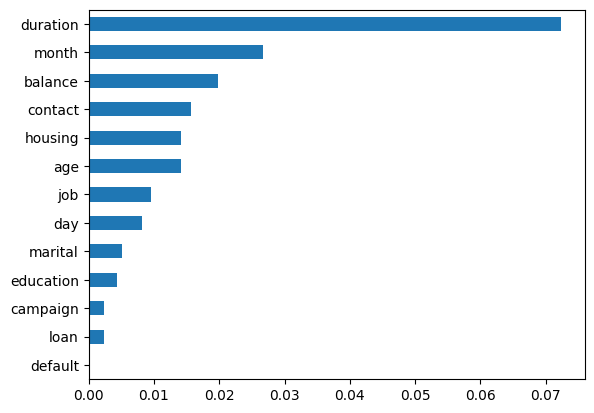

In [589]:
%matplotlib inline
mi.sort_values(ascending=True).plot.barh()

In [590]:
from sklearn.feature_selection import SelectKBest

In [591]:
sel_five_col=SelectKBest(mutual_info_classif,k=5)

In [592]:
sel_five_col.fit(x_train_ax,y_train_ax)

SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x000001595CAEDE40>)

In [593]:
x_train_ax.columns[sel_five_col.get_support()]

Index(['age', 'balance', 'contact', 'month', 'duration'], dtype='object')

In [594]:
indep

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,4,1,2,0,2143,1,0,2,5,8,261,1
1,44,9,2,1,0,29,1,0,2,5,8,151,1
2,33,2,1,1,0,2,1,1,2,5,8,76,1
3,47,1,1,3,0,1506,1,0,2,5,8,92,1
4,33,11,2,3,0,1,0,0,2,5,8,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5
45209,57,1,1,1,0,668,0,0,1,17,9,508,4


In [595]:
indep_new=indep.drop(['job','marital','education','default','loan','contact','day','campaign'],axis=1)

In [596]:
indep_new

,age,balance,housing,month,duration
0,58,2143,1,8,261
1,44,29,1,8,151
2,33,2,1,8,76
3,47,1506,1,8,92
4,33,1,0,8,198
...,...,...,...,...,...
45206,51,825,0,9,977
45207,71,1729,0,9,456
45208,72,5715,0,9,1127
45209,57,668,0,9,508


In [597]:
from sklearn.model_selection import train_test_split
x_train_ax,x_test_ax,y_train_ax,y_test_ax = train_test_split(indep_new,dep,test_size = 0.3)

In [598]:
x_train_ax.shape

(31647, 5)

In [599]:
x_test_ax.shape

(13564, 5)

In [600]:
y_train_ax.shape

(31647,)

In [601]:
y_test_ax.shape

(13564,)

In [602]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()

In [603]:
dtc1

DecisionTreeClassifier()

In [604]:
dtc1.fit(x_train_ax,y_train_ax)

DecisionTreeClassifier()

In [605]:
y_pred_new=dtc1.predict(x_test_ax)
y_pred_new

array([0, 0, 0, ..., 0, 1, 0])

In [606]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_pred_new,y_test_ax)

In [607]:
cm1

array([[10920,  1037],
       [ 1016,   591]])

In [608]:
from sklearn.metrics import classification_report
cr1 = classification_report(y_pred_new,y_test_ax)

In [609]:
print(cr1)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     11957
           1       0.36      0.37      0.37      1607

    accuracy                           0.85     13564
   macro avg       0.64      0.64      0.64     13564
weighted avg       0.85      0.85      0.85     13564

